# Gráficos con `matplotlib`

Además de su uso en Python, se pueden usar *comandos del notebook* para modificar el comportamiento de los gráficos en Jupyter. Por ejemplo:

- `%matplotlib inline`: por defecto devuelve gráficos no interactivos.
- `%matplotlib notebook`: gráficos interactivos

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


Definimos un conjunto de 51 datos equiespaciados entre 0 y 4, y la función

$$
y = f(x) = 2.5 e^{-1.3 x} + 0.5. e^{-1.6 x}
$$

Además, definimos un conjunto de datos _con ruido_, sumando a $y$ un ruido gaussiano de media 0 y dispersión 1 (ver `help(np.random.normal)`):

In [2]:
x = np.linspace(0,4,51)
y = 2.5 * np.exp(-1.3 * x) + 0.5 * np.exp(-1.6 * x)
ruido = 0.2 * np.random.normal(size=x.size)
medicion = y + ruido

print(x.size)

51


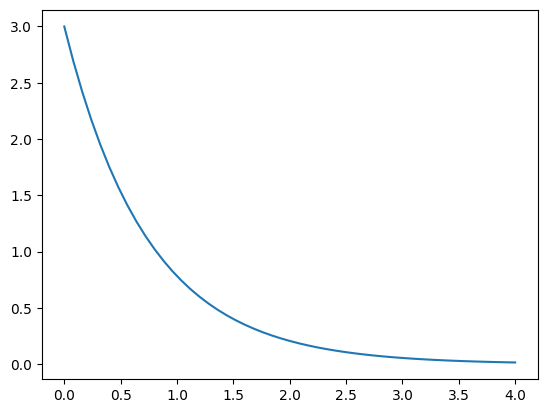

In [3]:
# esto sólo hace falta ejecutarlo una vez en el notebook.
%matplotlib inline 
plt.plot(x, y)     # Arma el gráfico
plt.show()         # Se muestra el gráfico en la pantalla

In [4]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'
    Plot y versus x as lines and/or markers.

    Call signatures::

        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

    The coordinates of the points or line nodes are given by *x*, *y*.

    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.

    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses

    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line pro

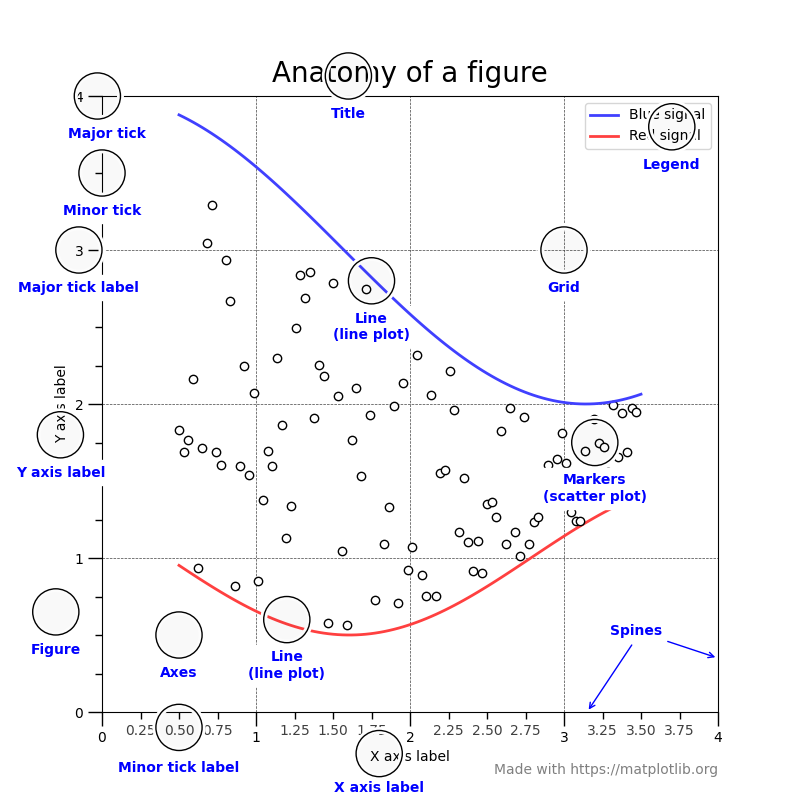

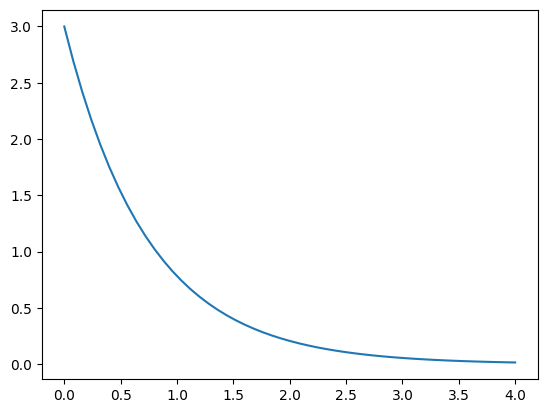

In [5]:
%matplotlib inline
plt.plot(x, y)
plt.show()

### Líneas, símbolos y colores

La forma más simple de elegir el modo de graficación de la curva es a través de un tercer argumento.
Este argumento, que aparece inmediatamente después de los datos (x e y), permite controlar el tipo de línea o símbolo utilizado en la graficación. En el caso de la línea sólida se puede especificar con un guión ('-') o simplemente no poner nada, ya que línea sólida es el símbolo por defecto. Las dos especificaciones anteriores son equivalentes. También se puede elegir el color, o el símbolo a utilizar con este argumento:

```python
plot(x,y,'g-')
plot(x,y,'ro')
plot(x,y,'r-o')
```

![](figuras/simple_linea_simb.png)

Para obtener círculos usamos una especificación que corresponde a 'o'. Además podemos poner en este argumento el color. En este caso elegimos graficar en color "rojo (r), con una línea (-) + círculos (o)".

Con esta idea modificamos el gráfico anterior

In [6]:
%matplotlib notebook

plt.plot(x, medicion, 'v--')
plt.plot(x, y, 'c-')
plt.show()

<IPython.core.display.Javascript object>

Los siguientes caracteres pueden utilizarse para controlar el símbolo de graficación:


| Símbolo   |     Descripción        |
|-----------|------------------------|
| '-'       | solid line style       |
| '--'      | dashed line style      |
| '-.'      | dash-dot line style    |
| ':'       | dotted line style      |
| '.'       | point marker           |
| ','       | pixel marker           |
| 'o'       | circle marker          |
| 'v'       | triangle down  marker  |
| '^'       | triangle up  marker    |
| '&lt;'    | triangle left  marker  |
| '&gt;'    | triangle right  marker |
| '1'       | tri down  marker       |
| '2'       | tri up  marker         |
| '3'       | tri left  marker       |
| '4'       | tri right  marker      |
| 's'       | square marker          |
| 'p'       | pentagon marker        |
| '\*'      | star marker            |
| 'h'       | hexagon1 marker        |
| 'H'       | hexagon2 marker        |
| '+'       | plus marker            |
| 'x'       | x marker               |
| 'D'       | diamond marker         |
| 'd'       | thin diamond marker    |
| '&#124;'  | vline marker           |
| '\_'      | hline marker           |


Los colores también pueden elegirse usando los siguientes caracteres:


|  Letra  |   Color  |
|---------|----------|
|'b'      |   blue   |
|'g'      |   green  |
|'r'      |   red    |
|'c'      |   cyan   |
|'m'      |   magenta|
|'y'      |   yellow |
|'k'      |   black  |
|'w'      |   white  |


La función `plot()` acepta un número variable de argumentos. Veamos lo que dice la documentación

```python
Signature: plt.plot(*args, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)```

En particular, podemos usar los argumentos *keywords* (pares nombre-valor) para cambiar el modo en que se grafican los datos. Algunos de los más comunes son:

| Argumento       | Valor                        |
|-----------------|------------------------------|
| linestyle       | {'-', '–', '-.', ':', '', …} |
| linewidth       | número real                  |
| color           | un color                     |
| marker          | {'o', 's', 'd', ….}          |
| markersize      | número real                  |
| markeredgecolor | color                        |
| markerfacecolor | color                        |
| markevery       | número entero                |



In [7]:
%matplotlib notebook
plt.plot(x,y,linewidth=4)
plt.plot(x,medicion, 'o:', color='red', markersize=6)
plt.show()

In [8]:
plt.plot(x,medicion, 'o:', color='red', markersize=5)
plt.plot(x,y,linewidth=4)
plt.show()

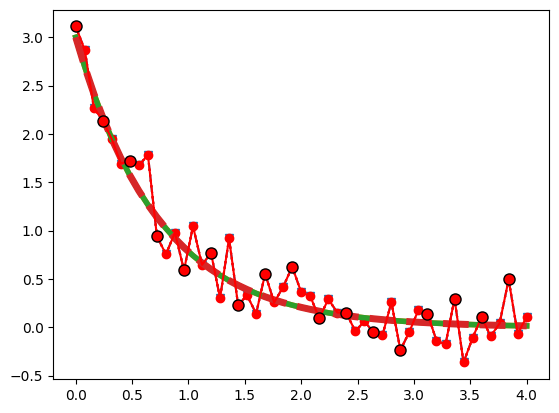

In [9]:
%matplotlib inline
plt.plot(x,y,linewidth=5, linestyle='dashed')
plt.plot(x,medicion, '-o', color='red', markersize=8, markeredgecolor='black',markevery=3)
plt.show()

### Nombres de ejes y leyendas

Vamos ahora a agregar nombres a los ejes y a las curvas.

Para agregar nombres a las curvas, tenemos que agregar un `label`, en este caso en el mismo comando `plot()`, y luego
mostrarlo con `legend()

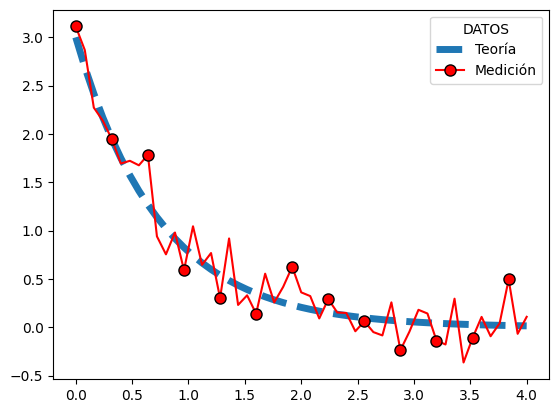

In [10]:
plt.plot(x,y,linewidth=5, linestyle='dashed', label='Teoría')
plt.plot(x,medicion, '-o', color='red', markersize=8, markeredgecolor='black',markevery=4, label='Medición')
plt.legend(title='DATOS')
plt.show()

Para agregar nombres a los ejes usamos `xlabel` y `ylabel`:
Los títulos a la figura se pueden agregar con `title`:

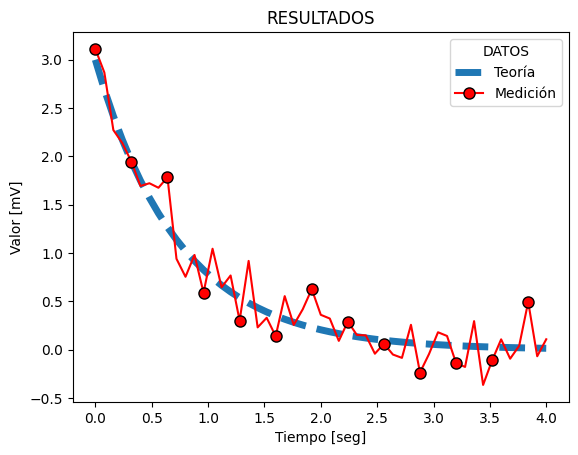

In [11]:
plt.plot(x,y,linewidth=5, linestyle='dashed', label='Teoría')
plt.plot(x,medicion, '-o', color='red', markersize=8, markeredgecolor='black',markevery=4, label='Medición')
plt.legend(title='DATOS')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Valor [mV]')
plt.title('RESULTADOS')
plt.show()

Podemos tambien graficar lineas verticales y horizontales usando `axvline` y `axhline`

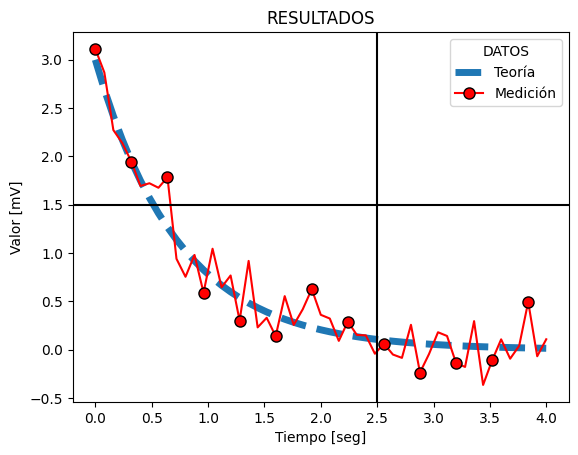

In [12]:
plt.plot(x,y,linewidth=5, linestyle='dashed', label='Teoría')
plt.plot(x,medicion, '-o', color='red', markersize=8, markeredgecolor='black',markevery=4, label='Medición')
plt.legend(title='DATOS')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Valor [mV]')
plt.title('RESULTADOS')
plt.axvline(x=2.5, color='black')
plt.axhline(y = 1.5, color='black')
plt.show()

Para pasar a escala logarítmica usamos `xscale` o `yscale`

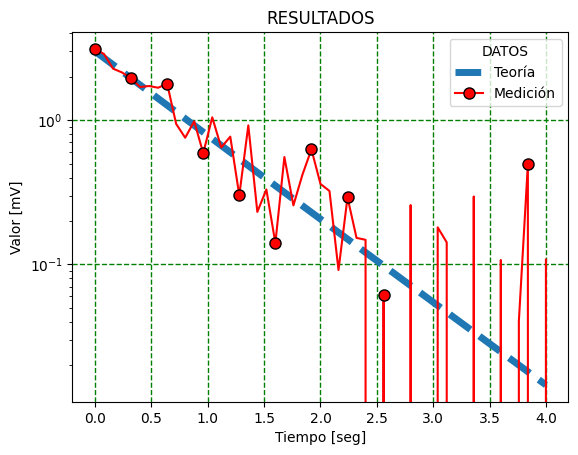

In [13]:
plt.plot(x,y,linewidth=5, linestyle='dashed', label='Teoría')
plt.plot(x,medicion, '-o', color='red', markersize=8, markeredgecolor='black',markevery=4, label='Medición')
plt.legend(title='DATOS')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Valor [mV]')
plt.title('RESULTADOS')
#plt.xscale('log')
plt.yscale('log')
plt.grid(color='green', linestyle='dashed', linewidth=1)
plt.show()

### Dos gráficos en la misma figura

Hay varias funciones que permiten poner más de un gráfico en la misma figura. Veamos un ejemplo utilizando `figure` y `add_subplot`

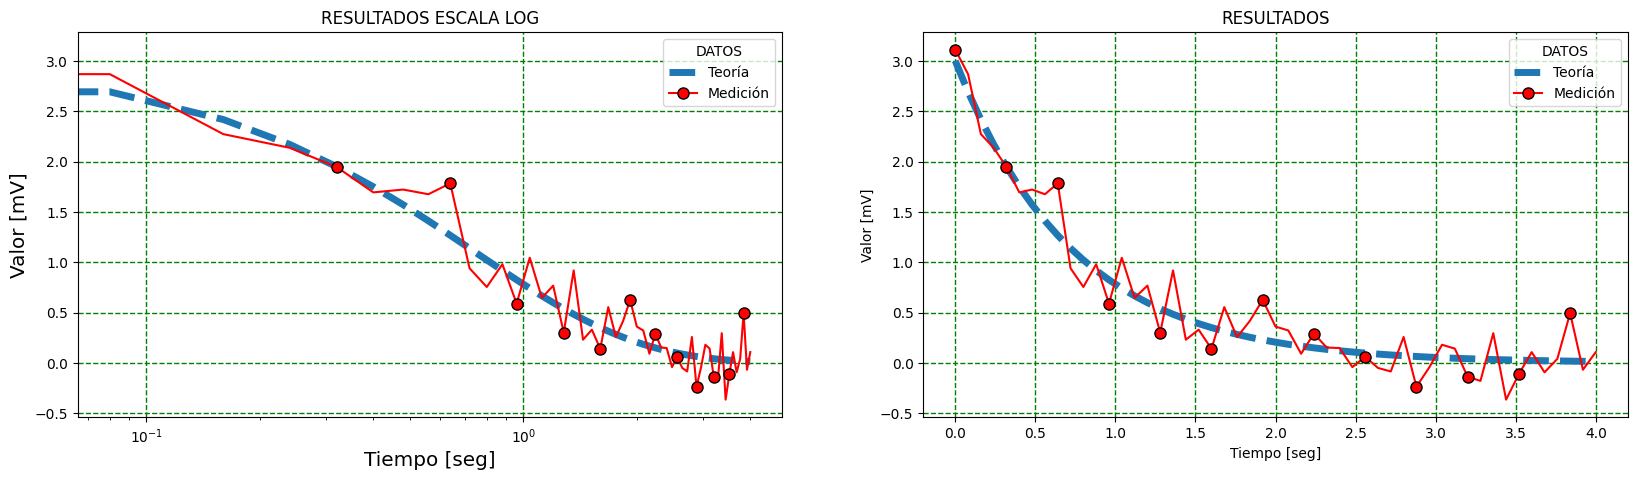

In [14]:
fig_1 = plt.figure(1, figsize=[20, 5])
graf1 = fig_1.add_subplot(121) #1: número de filas 2: número de columnas 1:el número de subplot
graf2 = fig_1.add_subplot(122) #1: número de filas 2: número de columnas 2:el número de subplot

graf1.plot(x,y,linewidth=5, linestyle='dashed', label='Teoría')
graf1.plot(x,medicion, '-o', color='red', markersize=8, markeredgecolor='black',markevery=4, label='Medición')
graf1.legend(title='DATOS')
graf1.grid(color='green', linestyle='dashed', linewidth=1)

graf1.set_xlabel('Tiempo [seg]', fontsize='x-large')
graf1.set_ylabel('Valor [mV]', fontsize='x-large')
graf1.set_title('RESULTADOS ESCALA LOG')
graf1.set_xscale('log')

graf2.plot(x,y,linewidth=5, linestyle='dashed', label='Teoría')
graf2.plot(x,medicion, '-o', color='red', markersize=8, markeredgecolor='black',markevery=4, label='Medición')
graf2.legend(title='DATOS')
graf2.grid(color='green', linestyle='dashed', linewidth=1)

graf2.set_xlabel('Tiempo [seg]')
graf2.set_ylabel('Valor [mV]')
graf2.set_title('RESULTADOS')
plt.show()

In [15]:
print(type(fig_1))

<class 'matplotlib.figure.Figure'>


### Exportar las figuras

Para guardar las figuras en alguno de los formatos disponibles utilizamos la función `savefig()`.

In [16]:
foname = 'miplot'
# fig_1.savefig('{}.png'.format(foname), dpi=200)
# fig_1.savefig('{}.pdf'.format(foname))
fig_1.savefig('figura2.png', dpi=200)
fig_1.savefig('figura2.pdf')

Acá también se puede utilizar formato tipo LaTeX para parte del texto. Si utilizamos una expresión encerrada entre los símbolos `$`, matplotlib interpreta que está escrito en (un subconjunto) de LaTeX.

**Matplotlib** tiene un procesador de símbolos interno para mostrar la notación en LaTeX que reconoce los elementos más comunes, o puede elegirse utilizar un procesador LaTeX externo.

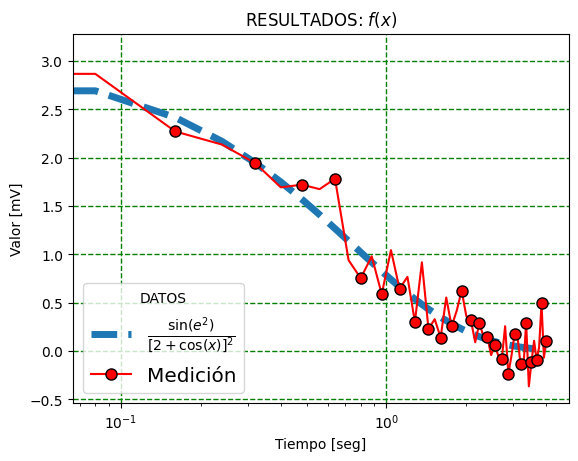

In [17]:
plt.plot(x,y,linewidth=5, linestyle='dashed', label=r"$\frac{\sin(e^2)}{[2 + \cos (x)]^2}$")
plt.plot(x,medicion, '-o', color='red', markersize=8, markeredgecolor='black',markevery=2, label='Medición')
plt.legend(title='DATOS', fontsize='x-large', shadow=False, loc=3)
plt.xlabel('Tiempo [seg]')
plt.ylabel('Valor [mV]')
plt.title('RESULTADOS: $f(x)$')
plt.xscale('log')
plt.grid(color='green', linestyle='dashed', linewidth=1)
plt.show()

### GRAFICOS CON COORDENADAS POLARES

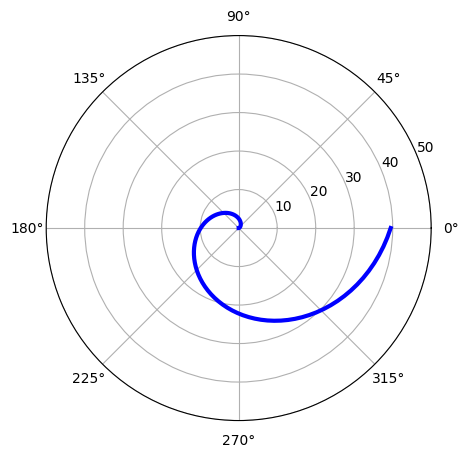

In [18]:
t = np.linspace(0, 2 * np.pi, 100)

fig_3 = plt.figure(3,figsize=[10,5])
ax = fig_3.add_subplot(111, polar=True)
ax.plot(t,t**2, color='blue', lw=3)
ax.set_xlim([0, 2 * np.pi])
ax.set_ylim([0, 50])
plt.show()

### OTROS GRAFICOS 2D

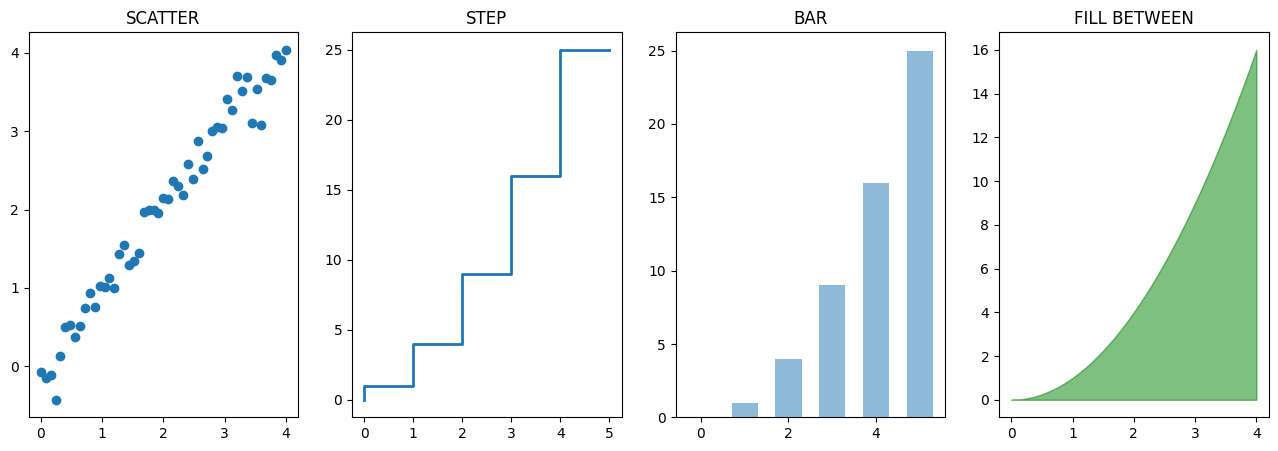

In [19]:
n = np.array([0,1,2,3,4,5])

fig, graf = plt.subplots(1,4, figsize=[16,5])
graf[0].set_title('SCATTER')
graf[0].scatter(x, x + 0.25*np.random.randn(len(x)))

graf[1].set_title('STEP')
graf[1].step(n,n**2, lw=2)

graf[2].set_title('BAR')
graf[2].bar(n,n**2, align='center', width=0.6, alpha=0.5)

graf[3].set_title('FILL BETWEEN')
graf[3].fill_between(x, x**2, color='green', alpha=0.5)



### HISTOGRAMAS

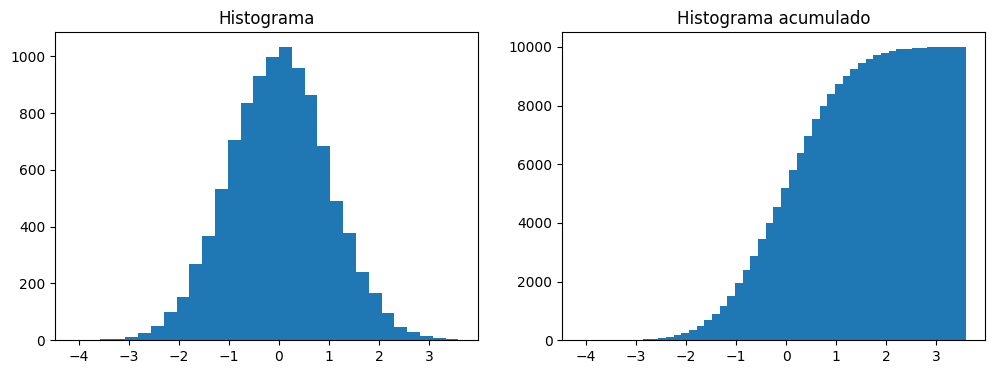

In [20]:
n = np.random.randn(10000) #randn devuelve una distribucion normal
fig, axes = plt.subplots(1, 2, figsize=[12,4])
axes[0].set_title('Histograma')
axes[0].hist(n, bins = 30)

axes[1].set_title('Histograma acumulado')
axes[1].hist(n, cumulative=True, bins=50)
plt.show()

In [21]:
A = np.array([2,3,4,5])

## Leyendo una imagen

Además de realizar gráficos 2D, `matplotlib` permite trabajar con imágenes. Se pueden leer imágenes que son interpretadas como un array de `numpy`.

In [22]:
import matplotlib.image as mpimg

grace = mpimg.imread('../Assets/grace_hopper.jpg')
print(grace.shape)
print(type(grace))


jean = mpimg.imread('../Assets/jean_sammet.jpg')
print(type(jean))

cirs = mpimg.imread('../Assets/cirs_slice.png')

FileNotFoundError: [Errno 2] No such file or directory: '../Assets/grace_hopper.jpg'

In [23]:
print(grace)

NameError: name 'grace' is not defined

Ambas imágenes tienen 3 canales, Rojo, Verde y Azul, que puede verse en el `shape` de cada una de ellas:

In [24]:
print(grace.shape)
print(jean.shape)

NameError: name 'grace' is not defined

NameError: name 'grace' is not defined

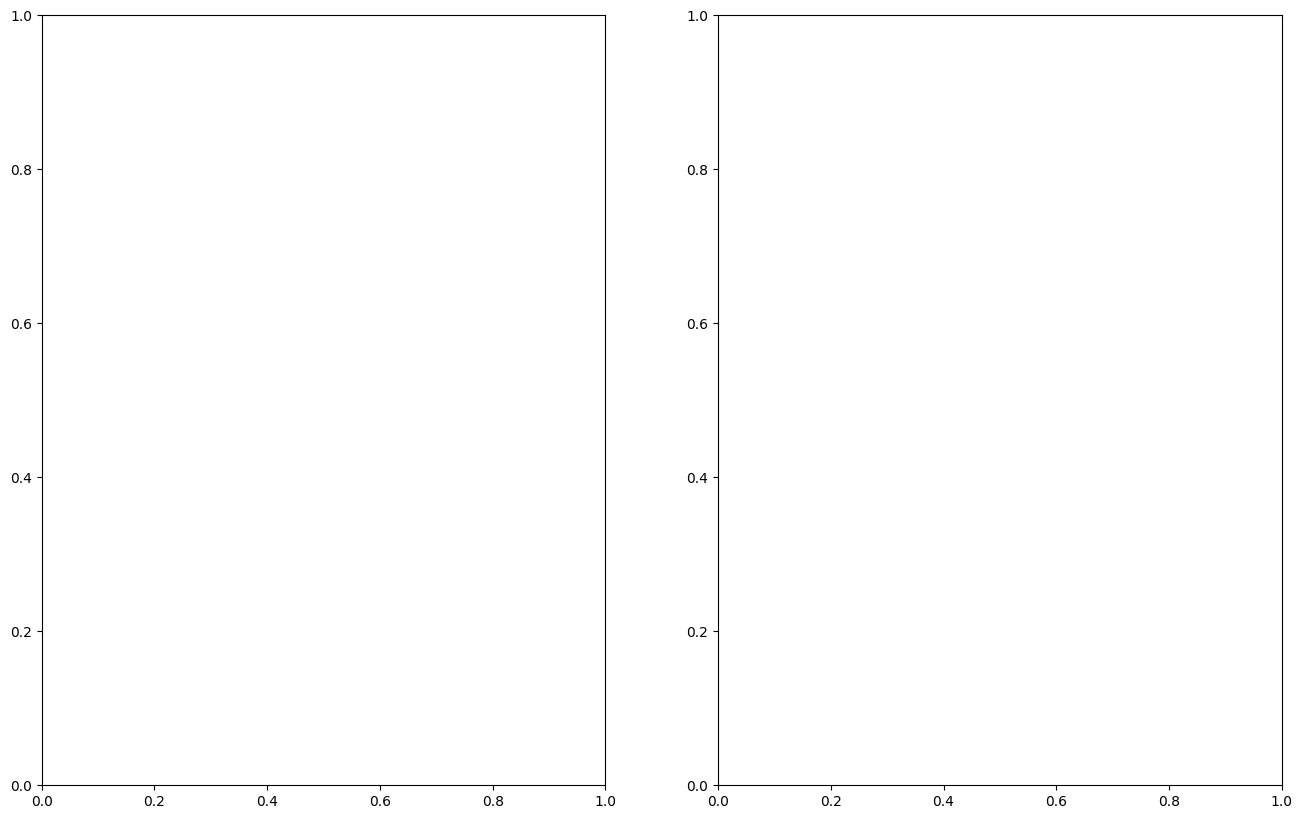

In [25]:
fig5, g = plt.subplots(1, 2, figsize=[16,10])
graceplt = g[0].imshow(grace)
g[0].set_title('Grace Hopper')
plt.colorbar(graceplt,ax = g[0],orientation='horizontal')

jeanplt = g[1].imshow(jean)
g[1].set_title('Jean Sammet')
plt.colorbar(jeanplt,ax = g[1],orientation='horizontal')

plt.show()

NameError: name 'grace' is not defined

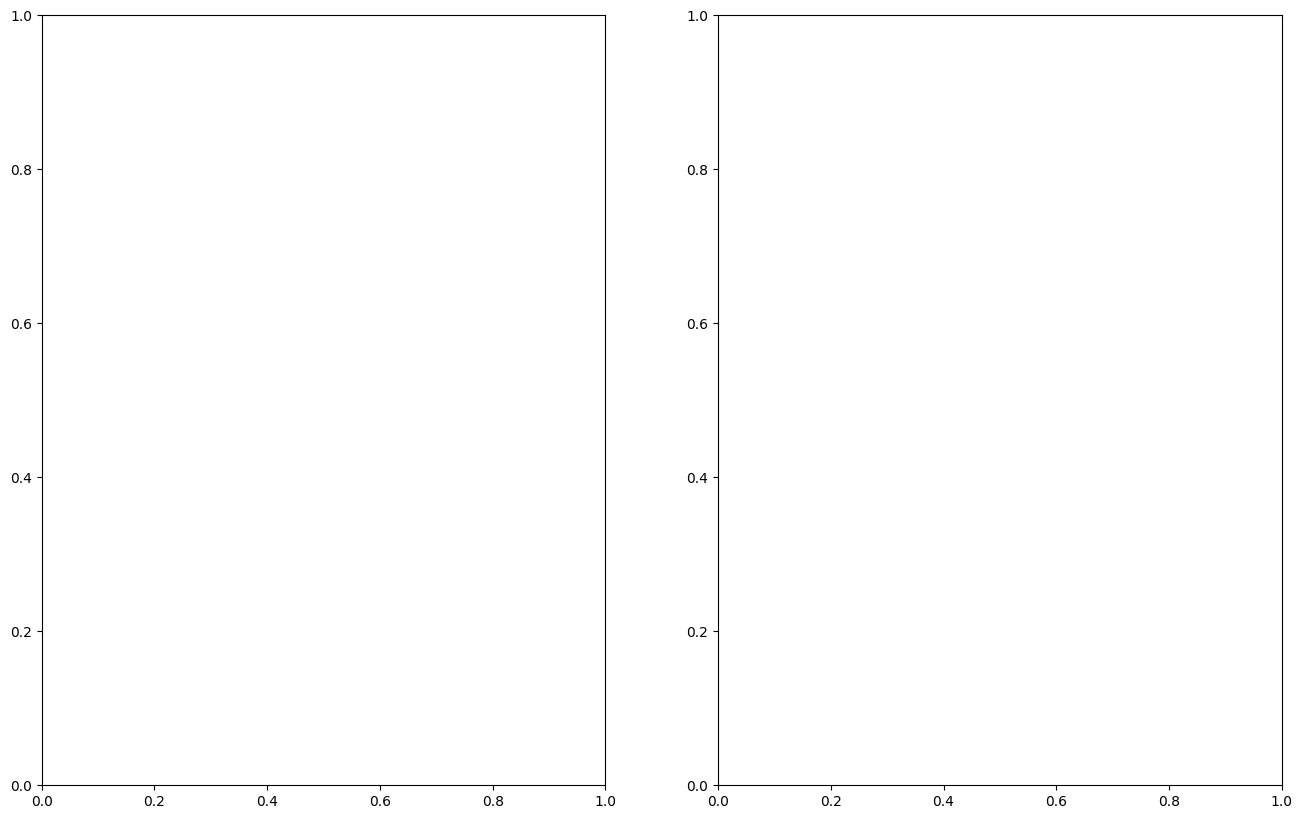

In [26]:
fig5, g = plt.subplots(1, 2, figsize=[16,10])
graceplt = g[0].imshow(grace[:,:,0], cmap = 'Paired')
g[0].set_title('Grace Hopper')
plt.colorbar(graceplt,ax = g[0],orientation='horizontal')

jeanplt = g[1].imshow(jean[:,:,0],cmap = 'Paired')
g[1].set_title('Jean Sammet')
plt.colorbar(jeanplt,ax = g[1],orientation='horizontal')

plt.show()

NameError: name 'grace' is not defined

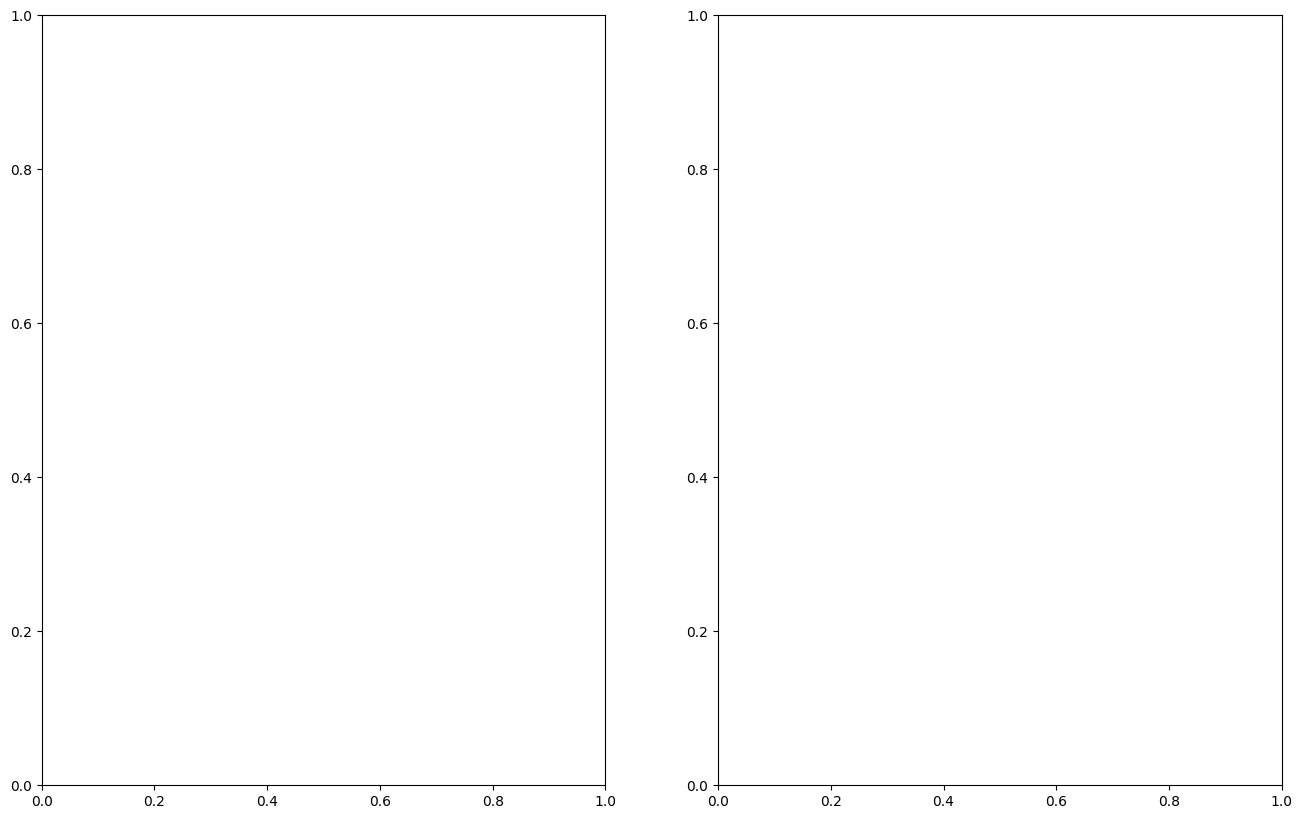

In [27]:
fig5, g = plt.subplots(1, 2, figsize=[16,10])
g[0].imshow(grace, cmap = 'gray')
g[0].set_title('IMAGEN')

g[1].set_title('HISTOGRAMA')
g[1].hist(grace[:,:,0].ravel(), bins=100) #ravel devuelve un vector 1D con todos los elementosde la matrix.
g[1].set_xlim([0, 255])
g[1].set_ylim([0, 5000])

plt.show()

In [28]:
ravel_grace = grace.ravel()
ravel_grace.shape
print(ravel_grace)

NameError: name 'grace' is not defined

Algo a tener en cuenta es que las imágenes pueden venir definidas como RGB con enteros entre 0 y 255, como las imágenes anteriores; o entre 0 y 1, como la siguiente:

In [29]:
cirs = mpimg.imread('../Assets/cirs_slice.png')
print(type(cirs))
print(cirs.shape)
print("Max image: ",np.max(cirs))
#
#  Puedo normalizar la imagen al rango 0-1
#
img_maximo = np.max(cirs)
cirs = cirs/img_maximo
#
#  Normalizo la imagen al rango 0-255
#
img_maximo = np.max(cirs)
cirs = cirs/img_maximo*255
cirs = cirs.astype(int) # Convierte el array de numpy de float a enteros


figcirs, g = plt.subplots(1, 2, figsize=[16,10])
g[0].imshow(cirs)
g[0].set_title('CIRS')

g[1].set_title('HISTOGRAMA')
g[1].hist(cirs.ravel(), bins=20, log=True) #ravel devuelve un vector 1D con todos los elementosde la matrix.
# g[1].set_xlim([0,1])
# g[1].set_ylim([0.1, 1000])
# g[1].set_yscale('log')

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../Assets/cirs_slice.png'

In [30]:
print(cirs)

NameError: name 'cirs' is not defined

También se puede calcular el histograma en `numpy`:

In [31]:
#
#  Puedo normalizar la imagen al rango 0-1
#
img_maximo = np.max(cirs)
cirs = cirs/img_maximo


nbins = 20
c = cirs.ravel()
h = np.histogram(c,bins=nbins) # np.histogram devuelve una tupla con dos arrays, el primero
                            # es el histograma, el segundo corresponde a los límites de los bines
print(type(h[0]))
print(h[0])
print(h[0].shape)
print(h[1].shape)

NameError: name 'cirs' is not defined

Pero es más trabajoso hacer el histograma a mano:
- Hay que notar la diferencia en el tamaño entre el histograma en `h[0]` y los límites de los bines en `h[1]`. Por eso es necesario seleccionar todos los elementos de `h[1]` excepto el último con `h[1][:-1]`. 
- Además usamos `align='edge'` para que las barras queden alineadas a la izquierda de cada intervalo.

In [32]:
widthbar = 1/nbins*0.95
plt.bar(h[1][:-1],h[0],width = widthbar,align='edge',log=True)


print(h[0])
print(h[1][:-1])

NameError: name 'nbins' is not defined